In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Define a function to load and concatenate all CSV files
def load_and_concatenate_csvs(directory_path):
    data_frames = []
    try:
        for file_name in os.listdir(directory_path):
            if file_name.endswith('.csv'):
                file_path = os.path.join(directory_path, file_name)
                df = pd.read_csv(file_path)
                data_frames.append(df)
        concatenated_df = pd.concat(data_frames, ignore_index=True)
        return concatenated_df
    except FileNotFoundError as e:
        print(f"Error: {e}")
        return pd.DataFrame()


directory_path = r'timeseries'  

In [9]:
# Load all CSV files
battery_data = load_and_concatenate_csvs(directory_path)


if not battery_data.empty:
    
    print("Data loaded successfully!")
    print(battery_data.info())
    print(battery_data.head())
    
    print("First few rows after preprocessing:")
    print(battery_data.head())

    
else:
    print("No data loaded. Please check the directory path and try again.")


Data loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3938536 entries, 0 to 3938535
Data columns (total 11 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Date_Time                    object 
 1   Test_Time (s)                float64
 2   Cycle_Index                  float64
 3   Current (A)                  float64
 4   Voltage (V)                  float64
 5   Charge_Capacity (Ah)         float64
 6   Discharge_Capacity (Ah)      float64
 7   Charge_Energy (Wh)           float64
 8   Discharge_Energy (Wh)        float64
 9   Environment_Temperature (C)  float64
 10  Cell_Temperature (C)         float64
dtypes: float64(10), object(1)
memory usage: 330.5+ MB
None
             Date_Time  Test_Time (s)  Cycle_Index  Current (A)  Voltage (V)  \
0  2011-02-04 17:19:22         30.000          1.0          0.0        4.102   
1  2011-02-04 17:19:52         60.015          1.0          0.0        4.102   
2  2011-02-04 1

In [10]:
# Calculate capacity fade
initial_capacity = battery_data['Charge_Capacity (Ah)'].iloc[0]
battery_data['Capacity_Fade'] = initial_capacity - battery_data['Discharge_Capacity (Ah)']

# Calculate energy efficiency
battery_data['Energy_Efficiency'] = battery_data['Discharge_Energy (Wh)'] / battery_data['Charge_Energy (Wh)']

# Calculate average voltage during charge and discharge cycles
battery_data['Average_Charge_Voltage'] = battery_data['Charge_Energy (Wh)'] / battery_data['Charge_Capacity (Ah)']
battery_data['Average_Discharge_Voltage'] = battery_data['Discharge_Energy (Wh)'] / battery_data['Discharge_Capacity (Ah)']

# Display the first few rows with new features
battery_data.head()


,Date_Time,Test_Time (s),Cycle_Index,Current (A),Voltage (V),Charge_Capacity (Ah),Discharge_Capacity (Ah),Charge_Energy (Wh),Discharge_Energy (Wh),Environment_Temperature (C),Cell_Temperature (C),Capacity_Fade,Energy_Efficiency,Average_Charge_Voltage,Average_Discharge_Voltage
0,2011-02-04 17:19:22,30.000,1.0,0.0,4.102,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN
1,2011-02-04 17:19:52,60.015,1.0,0.0,4.102,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN
2,2011-02-04 17:20:22,90.030,1.0,0.0,4.102,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN
3,2011-02-04 17:20:52,120.033,1.0,0.0,4.103,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN
4,2011-02-04 17:20:52,120.072,1.0,0.0,4.102,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN


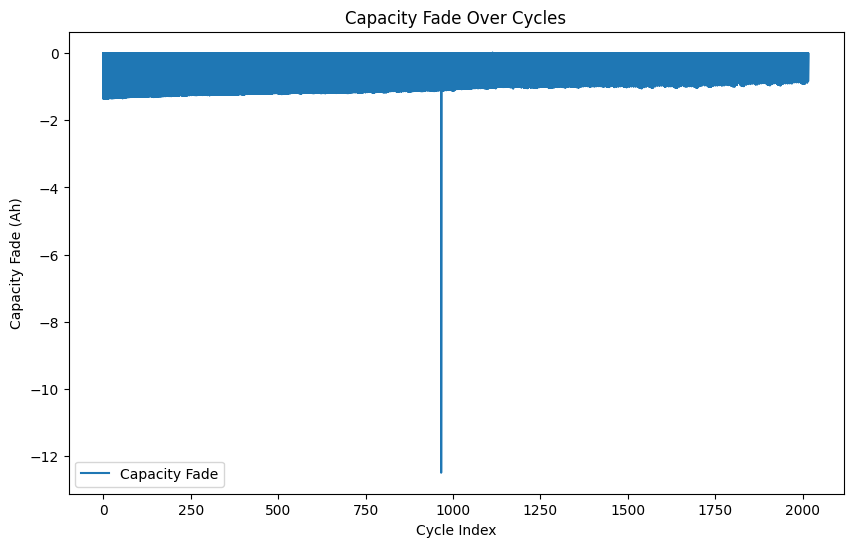

In [11]:
# Plot capacity fade over cycles
plt.figure(figsize=(10, 6))
plt.bar(battery_data['Cycle_Index'], battery_data['Capacity_Fade'], label='Capacity Fade')
plt.xlabel('Cycle Index')
plt.ylabel('Capacity Fade (Ah)')
plt.title('Capacity Fade Over Cycles')
plt.legend()
plt.show()


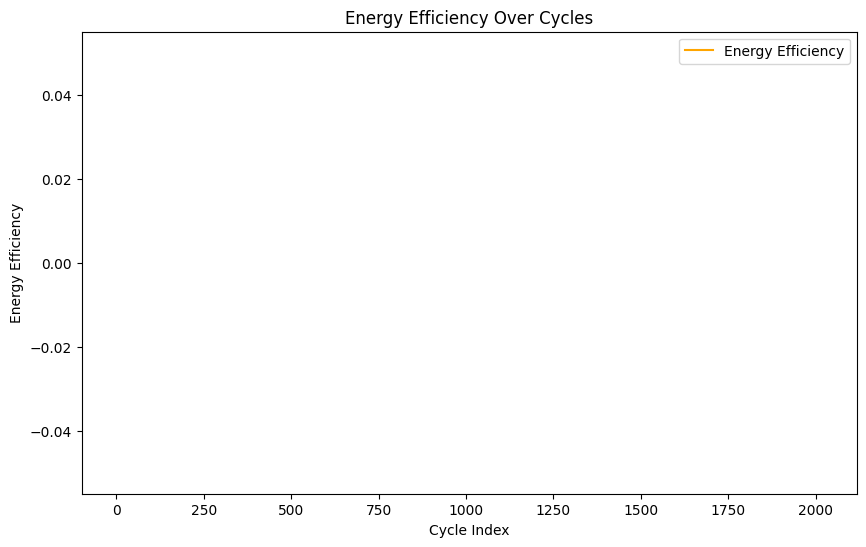

In [6]:
# Plot energy efficiency over cycles
plt.figure(figsize=(10, 6))
plt.plot(battery_data['Cycle_Index'], battery_data['Energy_Efficiency'], label='Energy Efficiency', color='orange')
plt.xlabel('Cycle Index')
plt.ylabel('Energy Efficiency')
plt.title('Energy Efficiency Over Cycles')
plt.legend()
plt.show()


In [8]:
# Plot average charge voltage over cycles
plt.figure(figsize=(10, 6))
plt.bar(battery_data['Cycle_Index'], battery_data['Average_Charge_Voltage'], label='Average Charge Voltage', color='green')
plt.xlabel('Cycle Index')
plt.ylabel('Average Charge Voltage (V)')
plt.title('Average Charge Voltage Over Cycles')
plt.legend()
plt.show()

# Plot average discharge voltage over cycles
plt.figure(figsize=(10, 6))
plt.plot(battery_data['Cycle_Index'], battery_data['Average_Discharge_Voltage'], label='Average Discharge Voltage', color='red')
plt.xlabel('Cycle Index')
plt.ylabel('Average Discharge Voltage (V)')
plt.title('Average Discharge Voltage Over Cycles')
plt.legend()
plt.show()
